In [28]:
from keras.datasets import reuters
import numpy as np

In [29]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [30]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [31]:
word_index = reuters.get_word_index()
reversed_word_index = dict([value, key] for (key, value) in word_index.items())
decoded_review = ' '.join(reversed_word_index.get(i - 3, '?') for i in train_data[0])
print(decoded_review)

? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


In [32]:
def vectorize_sequence(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [33]:
x_train = vectorize_sequence(train_data)
x_test = vectorize_sequence(test_data)

In [34]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

In [35]:
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [86]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu',input_shape=(10000,)))
model.add(layers.Dense(256, activation='relu'))

model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [87]:
# split data into training and validation set
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [90]:
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=9,
                   batch_size=512,
                   validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 3s 321us/step - loss: 0.0877 - acc: 0.9582 - val_loss: 1.1480 - val_acc: 0.8010
Epoch 2/9
7982/7982 [==============================] - 3s 316us/step - loss: 0.0872 - acc: 0.9588 - val_loss: 1.2899 - val_acc: 0.7820
Epoch 3/9
7982/7982 [==============================] - 2s 307us/step - loss: 0.0799 - acc: 0.9593 - val_loss: 1.2637 - val_acc: 0.7870
Epoch 4/9
7982/7982 [==============================] - 2s 306us/step - loss: 0.0802 - acc: 0.9583 - val_loss: 1.2794 - val_acc: 0.7940
Epoch 5/9
7982/7982 [==============================] - 2s 307us/step - loss: 0.0814 - acc: 0.9570 - val_loss: 1.2964 - val_acc: 0.7880
Epoch 6/9
7982/7982 [==============================] - 2s 306us/step - loss: 0.0785 - acc: 0.9574 - val_loss: 1.3142 - val_acc: 0.7940
Epoch 7/9
7982/7982 [==============================] - 2s 310us/step - loss: 0.0752 - acc: 0.9582 - val_loss: 1.2489 - val_acc: 0.7970
Epoch 8

In [91]:
results = model.evaluate(x_test, one_hot_test_labels)
print(results)

2246/2246 [==============================] - 0s 161us/step
[1.5455625791795957, 0.78762243994621961]


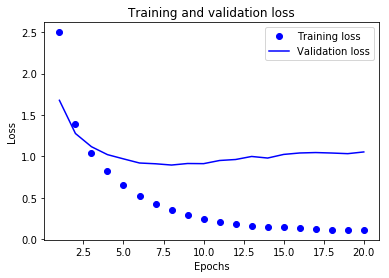

In [26]:
import matplotlib.pyplot as plt
history_dict = history.history
history_dict.keys()
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['acc']

epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

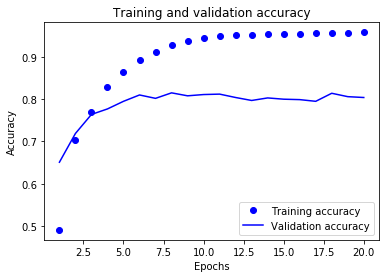

In [27]:
history_dict = history.history
history_dict.keys()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()